In [7]:
import numpy as np

train_dataset = np.load('dataset/train_set.npz')
test_dataset = np.load('dataset/test_set.npz')

In [8]:
x_train, y_train = train_dataset['x'], train_dataset['y']
x_test, y_test = test_dataset['x'], test_dataset['y']

In [9]:
x_train.shape

(1641, 128, 128, 3)

In [10]:
activation_function_name = 'relu'

In [11]:
import tensorflow as tf

#y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=3)
#y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [12]:
from module.activation_function import relu

def create_model(input_shape):
    input_layer = tf.keras.layers.Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(2, 2), activation=relu)(input_layer)
    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same')(x)
    x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation=relu)(x)
    x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation=relu)(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same')(x)
    x = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation=relu)(x)
    x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation=relu)(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation=relu)(x)
    x = tf.keras.layers.Dense(3, activation='softmax')(x)

    return tf.keras.models.Model(inputs=input_layer, outputs=x)

AttributeError: module 'keras.api._v2.keras' has no attribute 'saving'

In [ ]:
model = create_model(input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 63, 63, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                         

In [ ]:
# Define some Hyper Parameter
LEARNING_RATE = 0.0001
EPOCHS = 50
BATCH_SIZE=32

In [ ]:
from module.training import TensorflowTrainer

# Initializes the function
trainer = TensorflowTrainer(
    model=model,
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    train_acc_metric=tf.keras.metrics.CategoricalAccuracy(),
    test_acc_metric=tf.keras.metrics.CategoricalAccuracy()
)

# Prepare the dataset
# if categorical true convert the label into categorical with one-hot encoding
trainer.prepare_dataset(
    dataset_tuple=(x_train, y_train, x_test, y_test),
    num_classes=3,
    categorical=True
)

In [ ]:
# Train
train_result = trainer.train(logging_each_step=16)

Start of the Epoch 0


c:\Users\andro\.conda\envs\transformers\lib\site-packages\keras\backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Training loss at step 0 : 1.0983593463897705
Training loss at step 16 : 1.0966273546218872
Training loss at step 32 : 1.1073460578918457
Training loss at step 48 : 1.096798300743103
Epoch : 0. Training Accuracy : 0.36380255222320557 and Testing Accuracy : 0.5466179251670837, Training Loss : 1.7872615829110146, Testing Loss : 0.6161592341959476
Start of the Epoch 1
Training loss at step 0 : 1.0954608917236328
Training loss at step 16 : 1.08720064163208
Training loss at step 32 : 1.086726188659668
Training loss at step 48 : 1.049883246421814
Epoch : 1. Training Accuracy : 0.4311395585536957 and Testing Accuracy : 0.6087751388549805, Training Loss : 1.7580965235829353, Testing Loss : 0.5789217725396156
Start of the Epoch 2
Training loss at step 0 : 1.0821311473846436
Training loss at step 16 : 1.0321004390716553
Training loss at step 32 : 0.8751364946365356
Training loss at step 48 : 0.6954241991043091
Epoch : 2. Training Accuracy : 0.5096485614776611 and Testing Accuracy : 0.751371085643

In [ ]:
train_result.keys()

dict_keys(['final_train_accuracy', 'final_test_accuracy', 'train_accuracy', 'test_accuracy', 'train_loss', 'test_loss', 'gradient_trace', 'gradient_loss_trace'])

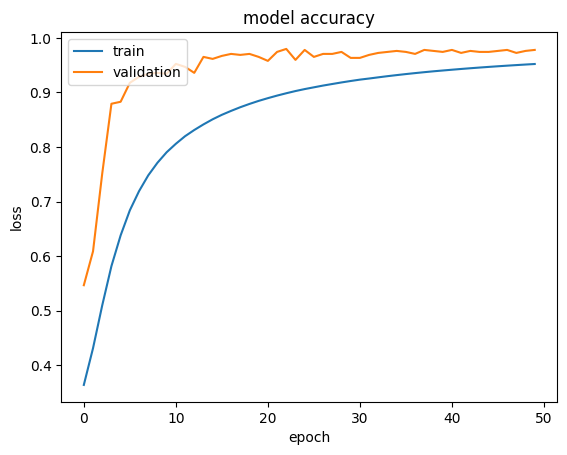

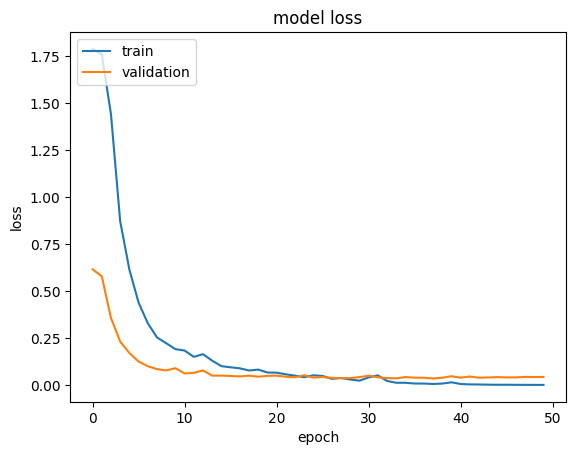

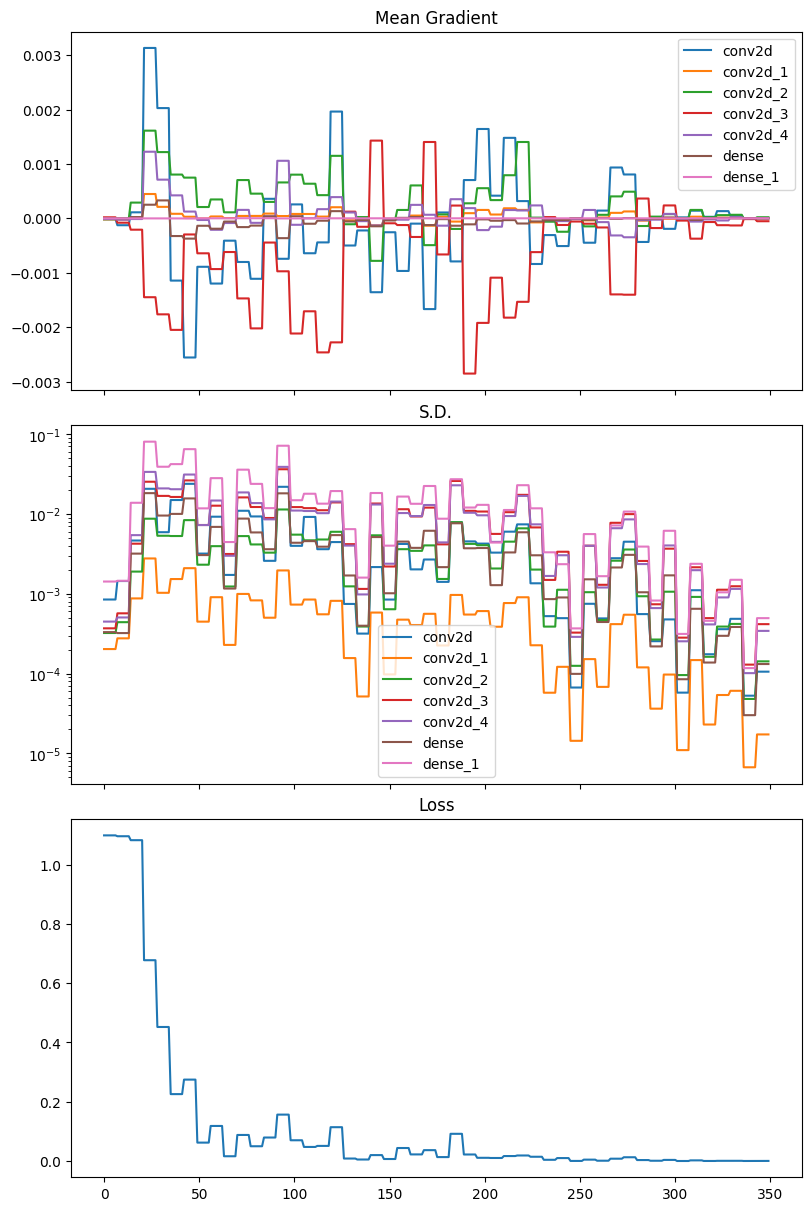

In [ ]:
from module.evaluation import Evaluation

eval_module = Evaluation()

eval_module.plot_accuracy(
    training_accuracy_list=train_result['train_accuracy'], 
    testing_accuracy_list=train_result['test_accuracy'],
    save_path=os.path.join('evaluation', activation_function_name)
)

eval_module.plot_loss(
    training_loss_list=train_result['train_loss'], 
    testing_loss_list=train_result['test_loss'],
    save_path=os.path.join('evaluation', activation_function_name)
)

eval_module.plot_gradient(
    gradient_history=train_result['gradient_trace'],
    loss_history=train_result['gradient_loss_trace'],
    save_path=os.path.join('evaluation', activation_function_name)
)

In [ ]:
print(train_result['final_train_accuracy'])
print(train_result['final_test_accuracy'])

0.9522364139556885
0.9780621528625488


In [ ]:
from module.utils import save_model

AttributeError: module 'keras.api._v2.keras' has no attribute 'saving'

In [ ]:
from module.utils import save_model

training_conf = {
    "learning_rate":LEARNING_RATE,
    "epoch":EPOCHS,
    "batch_size":BATCH_SIZE,
    "serialization_key":'custom_{}'.format(activation_function_name),
    "training_accuracy":train_result['final_train_accuracy'],
    "testing_accuracy":train_result['final_test_accuracy']
}

save_model(
    save_name='model_{}.h5'.format(activation_function_name),
    saving_folder='model/{}/'.format(activation_function_name),
    model=trainer.model,
    training_conf=training_conf
)

SyntaxError: unexpected EOF while parsing (utils.py, line 5)